In [10]:
!pip install xgboost




[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [11]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: C:\Users\prati sanghvi\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip


In [12]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from imblearn.under_sampling import RandomUnderSampler
import xgboost as xgb
import matplotlib.pyplot as plt

In [13]:
# Load the dataset
data = pd.read_csv('creditcard.csv')

In [14]:
# Split data into features (X) and target (y)
X = data.drop(columns='Class')
y = data['Class']

In [15]:
# Scale 'Time' and 'Amount' features
scaler = StandardScaler()
X[['Time', 'Amount']] = scaler.fit_transform(X[['Time', 'Amount']])

In [16]:
# Apply undersampling to balance the dataset
rus = RandomUnderSampler(random_state=42)
X_resampled, y_resampled = rus.fit_resample(X, y)

In [17]:
# Split the resampled data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42)

In [18]:
### Logistic Regression ###

# Train a Logistic Regression model
log_model = LogisticRegression()
log_model.fit(X_train, y_train)

# Predictions
y_pred_log = log_model.predict(X_test)


In [19]:
# Evaluation for Logistic Regression
print("Logistic Regression - Classification Report:\n", classification_report(y_test, y_pred_log))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_log))
print("ROC AUC Score:", roc_auc_score(y_test, y_pred_log))

Logistic Regression - Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.97      0.94       150
           1       0.96      0.90      0.93       146

    accuracy                           0.93       296
   macro avg       0.93      0.93      0.93       296
weighted avg       0.93      0.93      0.93       296

Confusion Matrix:
 [[145   5]
 [ 15 131]]
ROC AUC Score: 0.9319634703196347


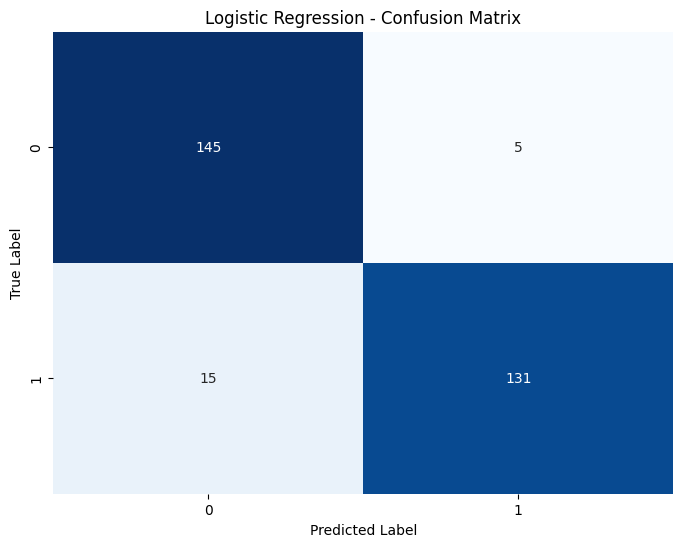

Logistic Regression - Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.97      0.94       150
           1       0.96      0.90      0.93       146

    accuracy                           0.93       296
   macro avg       0.93      0.93      0.93       296
weighted avg       0.93      0.93      0.93       296



In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

# Predictions for Logistic Regression (already in your code)
y_pred_log = log_model.predict(X_test)

# Confusion Matrix for Logistic Regression
cm_log = confusion_matrix(y_test, y_pred_log)

# Visualize Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_log, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Logistic Regression - Confusion Matrix')
plt.show()


print("Logistic Regression - Classification Report:\n", classification_report(y_test, y_pred_log))


In [21]:
### XGBoost Model ###

# Define the XGBoost classifier
xgb_model = xgb.XGBClassifier(
    scale_pos_weight=1,  # Since the dataset is balanced after resampling
    use_label_encoder=False,  # To avoid a warning in newer versions of XGBoost
    eval_metric='logloss',  # This is required in newer versions
    random_state=42
)

In [22]:
# Train the XGBoost model
xgb_model.fit(X_train, y_train)

# Make predictions for XGBoost
y_pred_xgb = xgb_model.predict(X_test)

In [23]:
# Evaluation for XGBoost
print("\nXGBoost - Classification Report:\n", classification_report(y_test, y_pred_xgb))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_xgb))
print("ROC AUC Score:", roc_auc_score(y_test, y_pred_xgb))


XGBoost - Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.95      0.93       150
           1       0.95      0.90      0.92       146

    accuracy                           0.93       296
   macro avg       0.93      0.93      0.93       296
weighted avg       0.93      0.93      0.93       296

Confusion Matrix:
 [[143   7]
 [ 15 131]]
ROC AUC Score: 0.9252968036529681


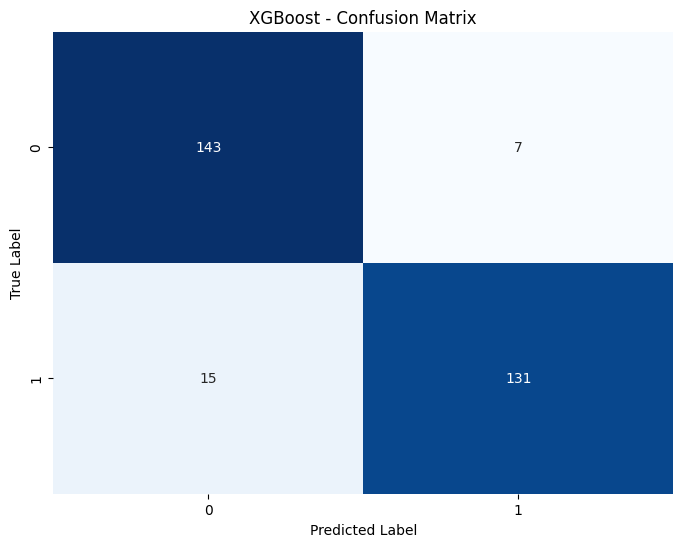

XGBoost - Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.95      0.93       150
           1       0.95      0.90      0.92       146

    accuracy                           0.93       296
   macro avg       0.93      0.93      0.93       296
weighted avg       0.93      0.93      0.93       296



In [24]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

# Predictions for XGBoost (already in your code)
y_pred_xgb = xgb_model.predict(X_test)

# Confusion Matrix for XGBoost
cm_xgb = confusion_matrix(y_test, y_pred_xgb)

# Visualize Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_xgb, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('XGBoost - Confusion Matrix')
plt.show()


print("XGBoost - Classification Report:\n", classification_report(y_test, y_pred_xgb))


In [25]:
### Hyperparameter Tuning using GridSearchCV ###

# Set up the parameter grid for tuning XGBoost
param_grid = {
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.3],
    'n_estimators': [100, 200, 300],
    'subsample': [0.7, 0.8, 0.9],
    'colsample_bytree': [0.7, 0.8, 0.9],
}

In [26]:
# Initialize GridSearchCV for XGBoost
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=3, scoring='roc_auc', verbose=2, n_jobs=-1)

# Fit the grid search
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 243 candidates, totalling 729 fits


GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False,
                                     eval_metric='logloss', feature_types=None,
                                     gamma=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=...
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=42, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.7, 0.8, 0.9],
                         'learning_rate': [0.01, 0.1, 0.3],
                         'max_depth': [3, 5, 7],
                         'n_estimators': [100, 200, 300],
                         'subsample': [0.7, 0.8, 0.9]},
             scoring='roc_auc', verbose=2)

In [27]:
# Best parameters from GridSearchCV
print("\nBest Parameters from GridSearch: ", grid_search.best_params_)

# Retrain the XGBoost model using best parameters
best_xgb_model = grid_search.best_estimator_

# Predict and evaluate using the best XGBoost model
y_pred_best_xgb = best_xgb_model.predict(X_test)


Best Parameters from GridSearch:  {'colsample_bytree': 0.9, 'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 100, 'subsample': 0.7}


In [28]:
# Evaluation with tuned XGBoost model
print("\nTuned XGBoost - Classification Report:\n", classification_report(y_test, y_pred_best_xgb))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_best_xgb))
print("ROC AUC Score:", roc_auc_score(y_test, y_pred_best_xgb))


Tuned XGBoost - Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.96      0.93       150
           1       0.96      0.90      0.93       146

    accuracy                           0.93       296
   macro avg       0.93      0.93      0.93       296
weighted avg       0.93      0.93      0.93       296

Confusion Matrix:
 [[144   6]
 [ 15 131]]
ROC AUC Score: 0.9286301369863014


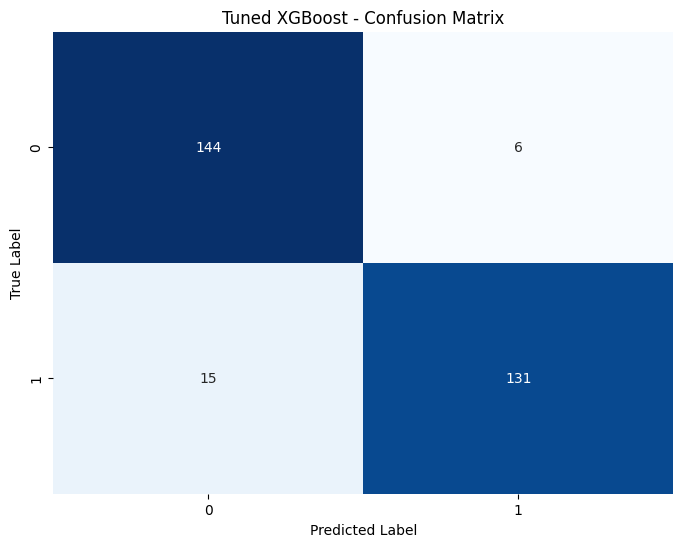

Tuned XGBoost - Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.96      0.93       150
           1       0.96      0.90      0.93       146

    accuracy                           0.93       296
   macro avg       0.93      0.93      0.93       296
weighted avg       0.93      0.93      0.93       296



In [29]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

# Predictions for the tuned XGBoost model (already in your code)
y_pred_best_xgb = best_xgb_model.predict(X_test)

# Confusion Matrix for tuned XGBoost
cm_best_xgb = confusion_matrix(y_test, y_pred_best_xgb)

# Visualize Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_best_xgb, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Tuned XGBoost - Confusion Matrix')
plt.show()


print("Tuned XGBoost - Classification Report:\n", classification_report(y_test, y_pred_best_xgb))


In [38]:
print("Columns in training data:", X.columns)
print("Columns in new data:", X_new.columns)


Columns in training data: Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount'],
      dtype='object')
Columns in new data: Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')


In [40]:
# Load new data
X_new = pd.read_csv('creditcard.csv')

# Ensure that the new data only contains columns used for training
# Drop any column that is not in the training data (e.g., 'Class')
X_new = X_new[X.columns]  # This keeps only the columns that were used in training

# Apply the same scaling to the 'Time' and 'Amount' features
X_new[['Time', 'Amount']] = scaler.transform(X_new[['Time', 'Amount']])

# Predict using the best model
y_pred_new = best_xgb_model.predict(X_new)

# Output results
X_new['Fraud Prediction'] = y_pred_new
print(X_new[['Time', 'Amount', 'Fraud Prediction']])


            Time    Amount  Fraud Prediction
0      -1.996583  0.244964                 0
1      -1.996583 -0.342475                 0
2      -1.996562  1.160686                 0
3      -1.996562  0.140534                 0
4      -1.996541 -0.073403                 0
...          ...       ...               ...
284802  1.641931 -0.350151                 0
284803  1.641952 -0.254117                 0
284804  1.641974 -0.081839                 0
284805  1.641974 -0.313249                 0
284806  1.642058  0.514355                 0

[284807 rows x 3 columns]


In [41]:
import pandas as pd
import xgboost as xgb
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from imblearn.under_sampling import RandomUnderSampler

# Load and preprocess the dataset
data = pd.read_csv('creditcard.csv')

# Split data into features (X) and target (y)
X = data.drop(columns='Class')
y = data['Class']

# Scale 'Time' and 'Amount' features
scaler = StandardScaler()
X[['Time', 'Amount']] = scaler.fit_transform(X[['Time', 'Amount']])

# Apply undersampling to balance the dataset
rus = RandomUnderSampler(random_state=42)
X_resampled, y_resampled = rus.fit_resample(X, y)

# Split the resampled data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42)

# Train the XGBoost model
xgb_model = xgb.XGBClassifier(
    scale_pos_weight=1,  # Balanced dataset
    use_label_encoder=False,
    eval_metric='logloss',
    random_state=42
)
xgb_model.fit(X_train, y_train)

# Example function for real-time prediction
def predict_fraud(new_data):
    # Ensure the new data has the same columns as the training data
    new_data = new_data[X.columns]
    
    # Apply scaling
    new_data[['Time', 'Amount']] = scaler.transform(new_data[['Time', 'Amount']])
    
    # Predict fraud
    predictions = xgb_model.predict(new_data)
    return predictions

# Simulate new transaction data
new_transactions = pd.read_csv('creditcard.csv')

# Predict fraud on new transactions
fraud_predictions = predict_fraud(new_transactions)

# Add predictions to new data
new_transactions['Fraud Prediction'] = fraud_predictions

# Example of handling predictions
def handle_fraud_predictions(data_with_predictions):
    # Flag transactions with fraud predictions
    fraud_transactions = data_with_predictions[data_with_predictions['Fraud Prediction'] == 1]
    
    # Actionable steps (e.g., alert the user, block the transaction)
    print("Potential Fraudulent Transactions:")
    print(fraud_transactions)

# Handle the results
handle_fraud_predictions(new_transactions)


C:\Users\prati sanghvi\AppData\Local\Temp\ipykernel_25404\246062446.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data[['Time', 'Amount']] = scaler.transform(new_data[['Time', 'Amount']])


Potential Fraudulent Transactions:
            Time        V1         V2        V3        V4        V5        V6  \
51          36.0 -1.004929  -0.985978 -0.038039  3.710061 -6.631951  5.122103   
102         69.0  0.298503   2.142722 -1.542143  1.561332  0.938108 -2.145673   
108         73.0  1.162281   1.248178 -1.581317  1.475024  1.138357 -1.020373   
164        103.0 -6.093248 -12.114213 -5.694973  3.294389 -1.413792  4.776000   
168        107.0  1.175125   0.661341 -0.477476  1.102542  0.543328 -0.246785   
...          ...       ...        ...       ...       ...       ...       ...   
284639  172630.0 -0.353261   1.607959 -0.648784  1.016583  1.729364 -0.511727   
284662  172653.0 -0.294488   0.960361 -0.880661  0.946303  2.125940  0.052208   
284669  172662.0  1.881521   1.192582 -1.740006  3.960403  1.282432 -0.164267   
284758  172745.0  1.911377   1.220896 -1.665127  4.148798  1.029442 -0.727610   
284782  172767.0 -0.268061   2.540315 -1.400915  4.846661  0.639105  0.186

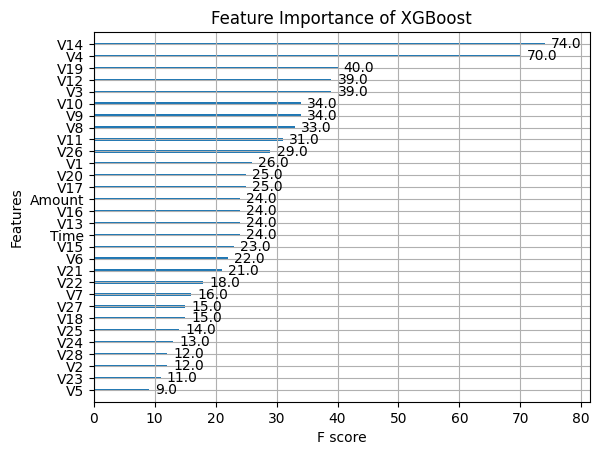

In [30]:
### Plot Feature Importance for XGBoost ###

xgb.plot_importance(best_xgb_model)
plt.title('Feature Importance of XGBoost')
plt.show()

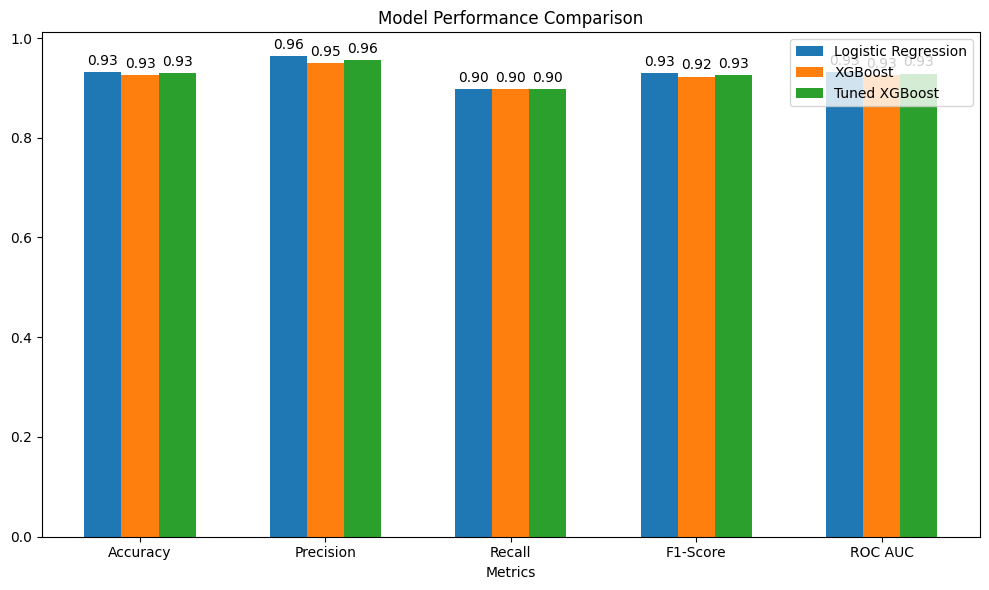

In [31]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Calculate the metrics for Logistic Regression
accuracy_log = accuracy_score(y_test, y_pred_log)
precision_log = precision_score(y_test, y_pred_log)
recall_log = recall_score(y_test, y_pred_log)
f1_log = f1_score(y_test, y_pred_log)
roc_auc_log = roc_auc_score(y_test, y_pred_log)

# Calculate the metrics for XGBoost
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
precision_xgb = precision_score(y_test, y_pred_xgb)
recall_xgb = recall_score(y_test, y_pred_xgb)
f1_xgb = f1_score(y_test, y_pred_xgb)
roc_auc_xgb = roc_auc_score(y_test, y_pred_xgb)

# Calculate the metrics for Tuned XGBoost
accuracy_best_xgb = accuracy_score(y_test, y_pred_best_xgb)
precision_best_xgb = precision_score(y_test, y_pred_best_xgb)
recall_best_xgb = recall_score(y_test, y_pred_best_xgb)
f1_best_xgb = f1_score(y_test, y_pred_best_xgb)
roc_auc_best_xgb = roc_auc_score(y_test, y_pred_best_xgb)

# Create a comparison table
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'ROC AUC']
log_metrics = [accuracy_log, precision_log, recall_log, f1_log, roc_auc_log]
xgb_metrics = [accuracy_xgb, precision_xgb, recall_xgb, f1_xgb, roc_auc_xgb]
best_xgb_metrics = [accuracy_best_xgb, precision_best_xgb, recall_best_xgb, f1_best_xgb, roc_auc_best_xgb]

# Plot the comparison chart
x = np.arange(len(metrics))  # the label locations
width = 0.2  # the width of the bars

fig, ax = plt.subplots(figsize=(10, 6))

rects1 = ax.bar(x - width, log_metrics, width, label='Logistic Regression')
rects2 = ax.bar(x, xgb_metrics, width, label='XGBoost')
rects3 = ax.bar(x + width, best_xgb_metrics, width, label='Tuned XGBoost')

# Add some text for labels, title, and custom x-axis tick labels, etc.
ax.set_xlabel('Metrics')
ax.set_title('Model Performance Comparison')
ax.set_xticks(x)
ax.set_xticklabels(metrics)
ax.legend()

# Function to add labels above the bars
def add_labels(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

add_labels(rects1)
add_labels(rects2)
add_labels(rects3)

plt.tight_layout()
plt.show()


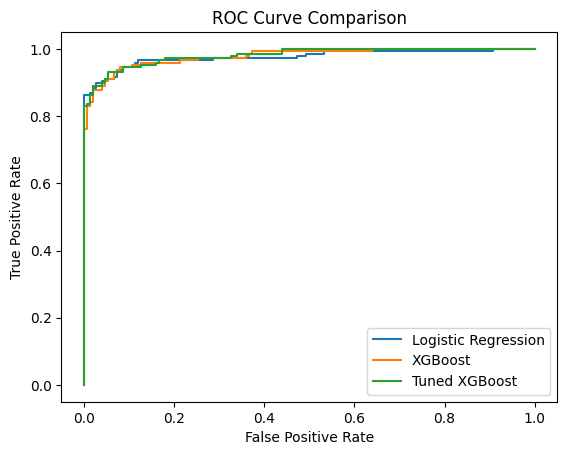

In [32]:
from sklearn.metrics import roc_curve

# ROC Curve for Logistic Regression
fpr_log, tpr_log, _ = roc_curve(y_test, log_model.predict_proba(X_test)[:, 1])
plt.plot(fpr_log, tpr_log, label='Logistic Regression')

# ROC Curve for XGBoost
fpr_xgb, tpr_xgb, _ = roc_curve(y_test, xgb_model.predict_proba(X_test)[:, 1])
plt.plot(fpr_xgb, tpr_xgb, label='XGBoost')

# ROC Curve for Tuned XGBoost
fpr_best_xgb, tpr_best_xgb, _ = roc_curve(y_test, best_xgb_model.predict_proba(X_test)[:, 1])
plt.plot(fpr_best_xgb, tpr_best_xgb, label='Tuned XGBoost')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend()
plt.show()


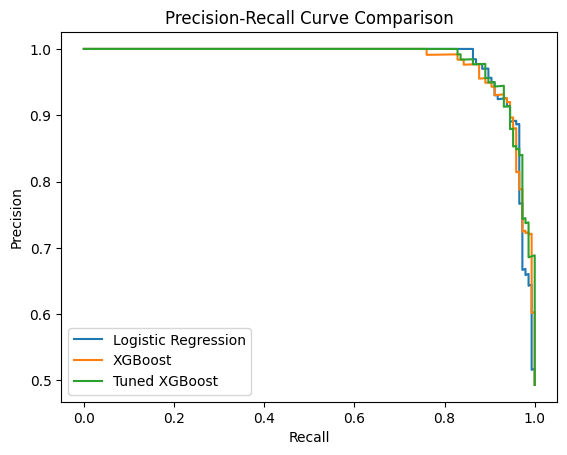

In [33]:
from sklearn.metrics import precision_recall_curve

# Precision-Recall Curve for Logistic Regression
precision_log, recall_log, _ = precision_recall_curve(y_test, log_model.predict_proba(X_test)[:, 1])
plt.plot(recall_log, precision_log, label='Logistic Regression')

# Precision-Recall Curve for XGBoost
precision_xgb, recall_xgb, _ = precision_recall_curve(y_test, xgb_model.predict_proba(X_test)[:, 1])
plt.plot(recall_xgb, precision_xgb, label='XGBoost')

# Precision-Recall Curve for Tuned XGBoost
precision_best_xgb, recall_best_xgb, _ = precision_recall_curve(y_test, best_xgb_model.predict_proba(X_test)[:, 1])
plt.plot(recall_best_xgb, precision_best_xgb, label='Tuned XGBoost')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve Comparison')
plt.legend()
plt.show()


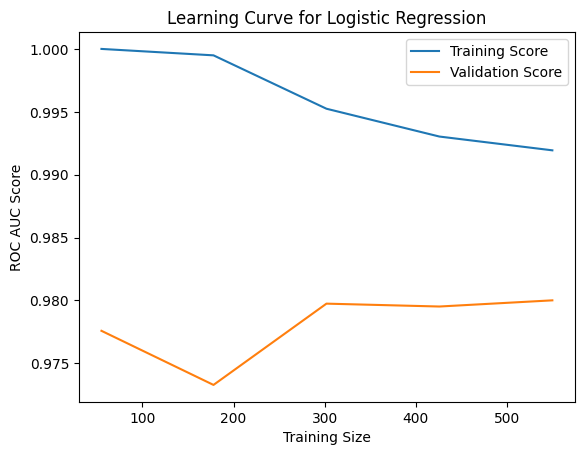

In [34]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(log_model, X_train, y_train, cv=5, scoring='roc_auc')

plt.plot(train_sizes, train_scores.mean(axis=1), label='Training Score')
plt.plot(train_sizes, test_scores.mean(axis=1), label='Validation Score')
plt.xlabel('Training Size')
plt.ylabel('ROC AUC Score')
plt.title('Learning Curve for Logistic Regression')
plt.legend()
plt.show()

# Repeat for XGBoost and Tuned XGBoost as needed


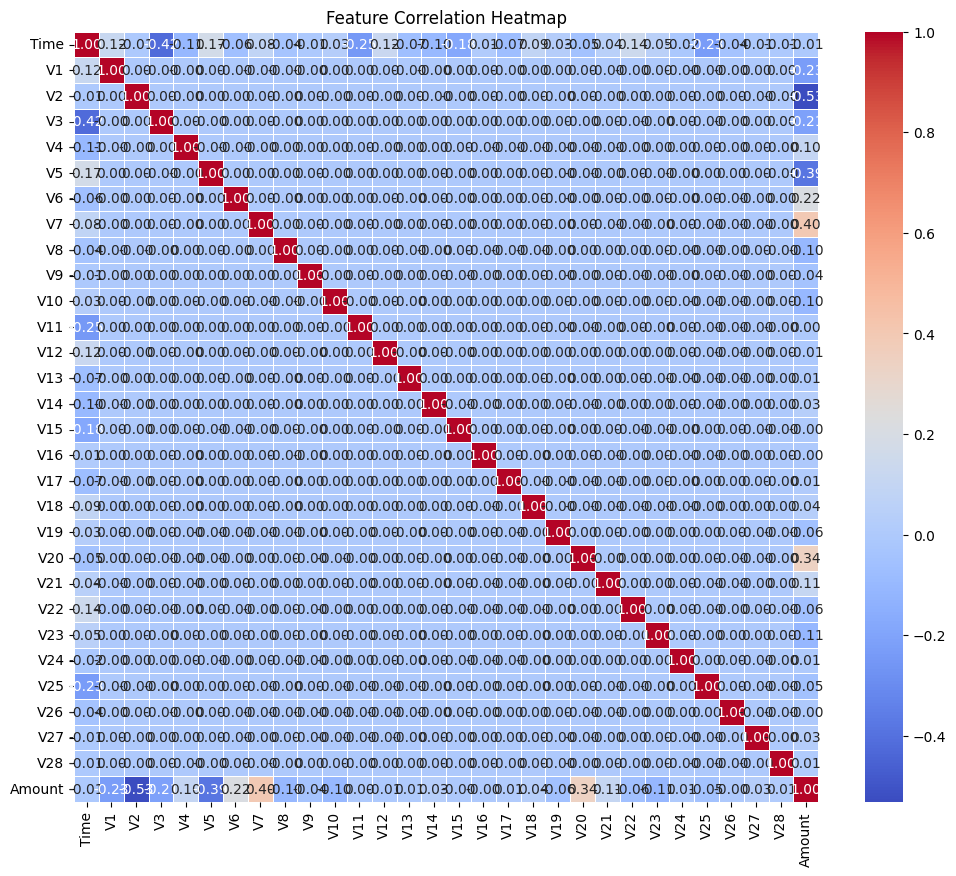

In [35]:
plt.figure(figsize=(12, 10))
sns.heatmap(X.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Feature Correlation Heatmap')
plt.show()


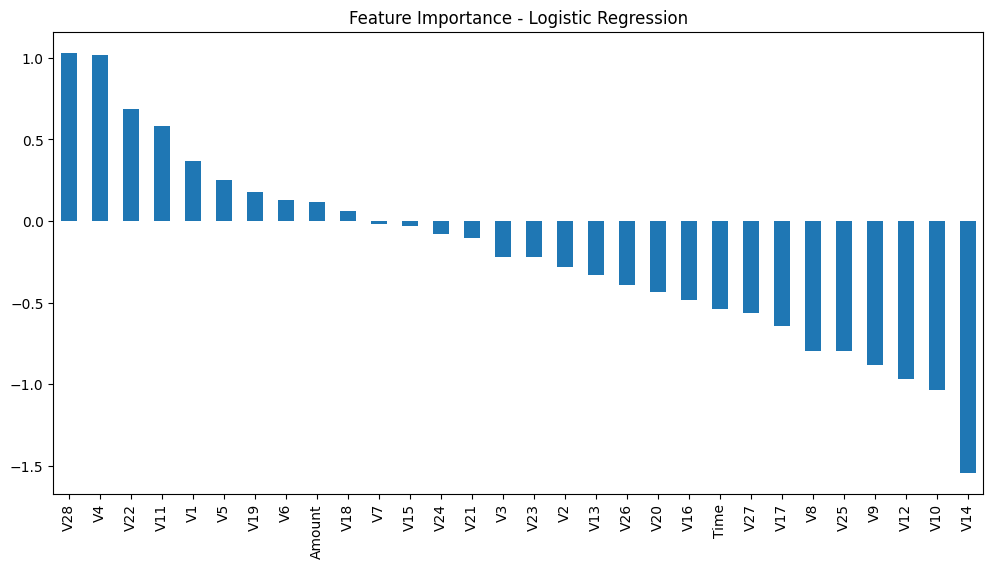

In [36]:
# Logistic Regression Coefficients
coefficients = log_model.coef_[0]
feature_importance_log = pd.Series(coefficients, index=X.columns).sort_values(ascending=False)

# Plotting
plt.figure(figsize=(12, 6))
feature_importance_log.plot(kind='bar')
plt.title('Feature Importance - Logistic Regression')
plt.show()
